# Loading Preprocessed Data

In [9]:
import pandas as pd

df = pd.read_csv('cleaned_network.csv')
df

,protocol_type,service,flag,src_bytes,dst_bytes,count,srv_count,srv_rerror_rate,dst_host_count,dst_host_srv_count,class
0,-0.247801,0.782637,-1.214300,-0.782189,-0.564874,1.448406,0.300187,1.113584,0.600455,-0.897696,0
1,-0.247801,0.782637,-1.214300,-0.782189,-0.564874,0.528536,-0.955734,1.113584,0.600455,-0.976287,0
2,-0.247801,1.509026,0.877059,0.242490,-0.236767,-0.806759,-0.955734,-0.898539,0.600455,1.241745,0
3,-0.247801,-1.105974,0.877059,-0.575665,-0.268824,-0.806759,-0.955734,-0.898539,-1.604666,-0.757977,0
4,-0.247801,1.509026,0.877059,-0.782189,-0.564874,-0.806759,-0.955734,-0.898539,0.600455,0.132729,0
...,...,...,...,...,...,...,...,...,...,...,...
7201,2.609250,0.492082,0.877059,0.131284,-0.564874,-0.599046,1.974749,-0.898539,0.578730,-0.792907,1
7202,-0.247801,-1.178613,0.877059,-0.710700,-0.302766,-0.806759,-0.955734,-0.898539,-1.126708,-0.950090,1
7203,-0.247801,-0.815419,0.877059,1.394260,2.495569,-0.806759,-0.955734,-0.898539,-1.170159,1.241745,1
7204,-0.247801,0.782637,-1.214300,-0.782189,-0.564874,1.507753,0.300187,1.113584,0.600455,-0.897696,0


# Modelling

# Split data into train and test

In [10]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['class'])
y = df['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Random Forest - SKLearn

In [11]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

parameters_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

rf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(estimator=rf, param_grid=parameters_rf, cv=3, scoring='accuracy')
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_

print("Best Parameters:", best_params)

Best Parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}


In [12]:
best_rf = RandomForestClassifier(**best_params, random_state=42)
best_rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, min_samples_split=5, random_state=42)

In [13]:
y_pred_rf = best_rf.predict(X_test)

accuracy_rf = accuracy_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf, average='weighted')

print("Accuracy (Random Forest):", accuracy_rf)
print("F1 Score (Random Forest):", f1_rf)

Accuracy (Random Forest): 0.9754856614246068
F1 Score (Random Forest): 0.9754200001781264


In [14]:
classif_report_rf = classification_report(y_test, y_pred_rf)
print('Classification Report (Random Forest):\n', classif_report_rf)

Classification Report (Random Forest):
               precision    recall  f1-score   support

           0       0.97      0.99      0.98      1375
           1       0.98      0.95      0.97       787

    accuracy                           0.98      2162
   macro avg       0.98      0.97      0.97      2162
weighted avg       0.98      0.98      0.98      2162



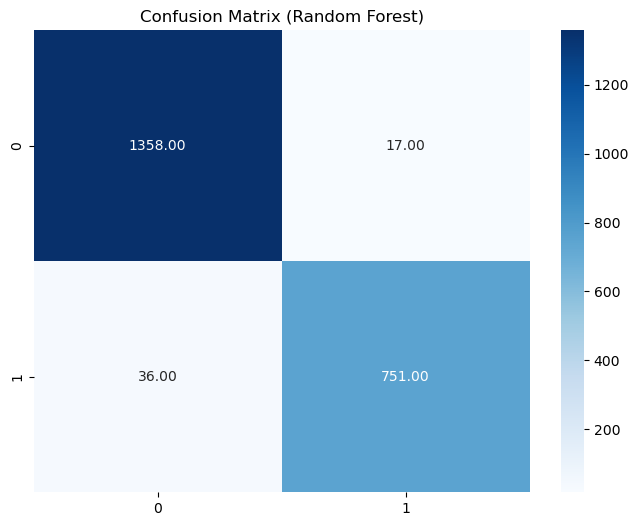

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)

plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix_rf, cmap='Blues',fmt='.2f',annot=True)
plt.title('Confusion Matrix (Random Forest)')
plt.show()

# XGBoost

In [19]:
import xgboost as xgb

parameters_xgb = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.3],
}

model_xgb = xgb.XGBClassifier(random_state=42)

grid_search = GridSearchCV(estimator=model_xgb, param_grid=parameters_xgb, cv=3, scoring='accuracy')
grid_search.fit(X_train, y_train)

best_params_xgb = grid_search.best_params_
print("Best Parameters:", best_params_xgb)

Best Parameters: {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 100}


In [20]:
best_xgb = xgb.XGBClassifier(**best_params, random_state=42)
best_xgb.fit(X_train, y_train)

y_pred_xgb = best_xgb.predict(X_test)

accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
f1_xgb = f1_score(y_test, y_pred_xgb, average='weighted')

print("Accuracy (XGBoost):", accuracy_xgb)
print("F1 Score (XGBoost):", f1_xgb)

C:\Users\Lenovo\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:18] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy (XGBoost): 0.973172987974098
F1 Score (XGBoost): 0.9731205514139859


In [21]:
classif_report_xgb = classification_report(y_test, y_pred_xgb)
print('Classification Report (XGBoost):\n', classif_report_xgb)

Classification Report (XGBoost):
               precision    recall  f1-score   support

           0       0.97      0.98      0.98      1375
           1       0.97      0.95      0.96       787

    accuracy                           0.97      2162
   macro avg       0.97      0.97      0.97      2162
weighted avg       0.97      0.97      0.97      2162



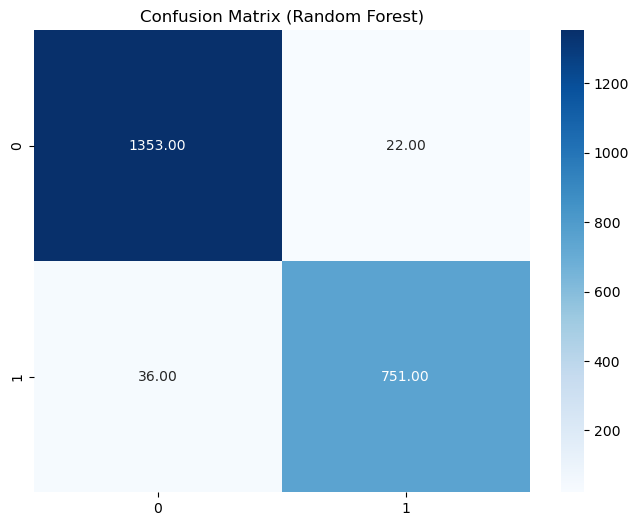

In [22]:
conf_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)

plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix_xgb, cmap='Blues',fmt='.2f',annot=True)
plt.title('Confusion Matrix (Random Forest)')
plt.show()

# Support Vector Machine (SVM)

In [23]:
from sklearn.svm import SVC

model_svm = SVC(random_state=42)
model_svm.fit(X_train, y_train)

y_pred_svm = model_svm.predict(X_test)

accuracy_svm = accuracy_score(y_test, y_pred_svm)
f1_svm = f1_score(y_test, y_pred_svm, average='weighted')

print("Accuracy (SVM):", accuracy_svm)
print("F1 Score (SVM):", f1_svm)

Accuracy (SVM): 0.9518963922294172
F1 Score (SVM): 0.9512533491117061


In [24]:
classif_report_svm = classification_report(y_test, y_pred_svm)
print("Classification Report (SVM):\n", classif_report_svm)

Classification Report (SVM):
               precision    recall  f1-score   support

           0       0.94      0.99      0.96      1375
           1       0.99      0.88      0.93       787

    accuracy                           0.95      2162
   macro avg       0.96      0.94      0.95      2162
weighted avg       0.95      0.95      0.95      2162



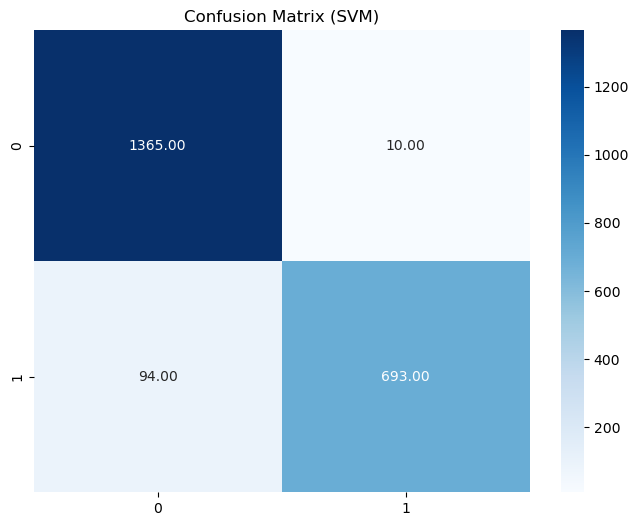

In [33]:
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)

plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix_svm, cmap='Blues',fmt='.2f',annot=True)
plt.title('Confusion Matrix (SVM)')
plt.show()

# SVM - LIBSVM

In [27]:
from libsvm.svmutil import svm_train, svm_predict

X_libsvm = X_train.values.tolist()
X_test_libsvm = X_test.values.tolist()
y_libsvm = y_train.tolist()
y_test_libsvm = y_test.tolist()

model_libsvm = svm_train(y_libsvm, X_libsvm, '-s 0 -t 0 -c 1')

svm_labels, svm_accuracy, _ = svm_predict(y_test_libsvm, X_test_libsvm, model_libsvm)

accuracy_libsvm = accuracy_score(y_test_libsvm, svm_labels)
f1_libsvm = f1_score(y_test_libsvm, svm_labels, average='weighted')

print("Accuracy (LIBSVM):", accuracy_libsvm)
print("F1 Score (LIBSVM):", f1_libsvm)

C:\Users\Lenovo\anaconda3\Lib\site-packages\libsvm\svm.py:148: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @jit


Accuracy = 93.1545% (2014/2162) (classification)
Accuracy (LIBSVM): 0.9315448658649399
F1 Score (LIBSVM): 0.9300660389742388


In [31]:
print('Classification Report (LIBSVM):\n', classification_report(y_test_libsvm, svm_labels))

Classification Report (LIBSVM):
               precision    recall  f1-score   support

           0       0.91      0.99      0.95      1375
           1       0.98      0.83      0.90       787

    accuracy                           0.93      2162
   macro avg       0.95      0.91      0.92      2162
weighted avg       0.94      0.93      0.93      2162



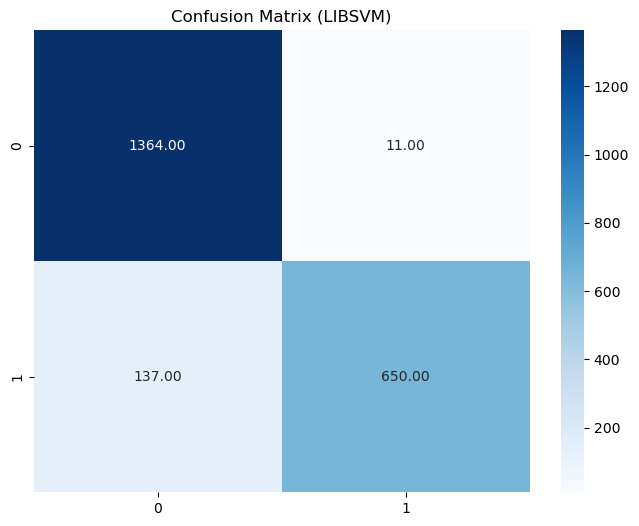

In [32]:
conf_matrix_libsvm = confusion_matrix(y_test_libsvm, svm_labels)

plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix_libsvm, cmap='Blues',fmt='.2f',annot=True)
plt.title('Confusion Matrix (LIBSVM)')
plt.show()